# Lab 1: Linear Regression and Overfitting

### Machine Learning and Pattern Recognition, September 2016

* The lab exercises should be made in groups of two people.
* The deadline is sunday September 25, 23:59.
* Assignment should be sent to your teaching assistant. The subject line of your email should be "\#lab\_lastname1\_lastname2\_lastname3".
* Put your and your teammates' names in the body of the email
* Attach the .IPYNB (IPython Notebook) file containing your code and answers. Naming of the file follows the same rule as the subject line. For example, if the subject line is "lab01\_Kingma\_Hu", the attached file should be "lab01\_Kingma\_Hu.ipynb". Only use underscores ("\_") to connect names, otherwise the files cannot be parsed.
* Make sure we can run your notebook / scripts!

Notes on implementation:

* You should write your code and answers in this IPython Notebook: http://ipython.org/notebook.html. If you have problems, please contact your teaching assistant.
* Please write your answers right below the questions.
* Among the first lines of your notebook should be "%pylab inline". This imports all required modules, and your plots will appear inline.
* Refer to last week's lab notes, i.e. http://docs.scipy.org/doc/, if you are unsure about what function to use. There are different correct ways to implement each problem!
* For this lab, your regression solutions should be in closed form, i.e., should not perform iterative gradient-based optimization but find the exact optimum directly.

In [294]:
%pylab inline
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D


def create_polyval(x,M):
    """ 
    INPUT: x vector, Mth order polynomial, 
    OUTPUT: phi basis functions
    This function creates the phi basis functions for the polynomial fit
    """
    
    # GET DATA SIZE
    N = x.shape[0]
    # print 'data points',N,'polynomial size:',M
    
    # INITIALIZE TO ZERO FOR CORRECT USAGE OF POWER FUNCTIONS
    phi = np.zeros((N, M+1))
    
    # RAISE TO POWER
    for i in range(M+1):            
        phi[:,i] = np.power(x,i)
        
    return phi

def rmse(prd,t):
    """ 
    INPUT: prd is prediction and t is target 
    OUTPUT: error
    This function calculates the root mean squared error between predictions and target values
    """
    targets = np.full(prd.shape, t)
    rms = np.sqrt(mean_squared_error(targets, prd))
    
    return rms
    

        

def fit_model(x, t, M, lamb=0.0):
    """ 
    INPUT: x vector, t values to fit with Mth order polynomial, regularized by lamb
    OUTPUT: w vector of weights, and phi basis functions
    This function fits a model according to regularized or unregularized polynomials
    """
    
    weights = []
    
    if type(M) == numpy.int32:
        if lamb == 0.0:
            poly_w = fit_polynomial(x,t,M)
            
            weights.append(poly_w)
        else:
            poly_w = fit_polynomial_reg(x,t,M,lamb)
            weights.append(poly_w)
        
    else: 
        for i in np.arange(M.shape[0]):
            if lamb == 0.0:
                poly_w = fit_polynomial(x,t,M[i])

                weights.append(poly_w)
            else:
                poly_w = fit_polynomial_reg(x,t,M[i],lamb)
                weights.append(poly_w)

    return weights


Populating the interactive namespace from numpy and matplotlib


$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

## Part 1: Polynomial Regression

### 1.1. Generate sinusoidal data (5 points)
Write a method `gen_sinusoidal(N)` that generates toy data like in fig 1.2 of Bishop's book. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from 0 to (including) 2$\pi$, and the elements $t_i$ of $\bt$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $\bf{x}$, the mean $\mu_i = sin(x_i)$ and the standard deviation $\sigma = 0.2$.


In [295]:
def gen_sinusoidal(N):
    """ 
    INPUT: N as the number of observations, 
    OUTPUT: vectors x and t
    This function creates data that follows a normal distribution with 
    mean = sin(x) and sigma = 0.2
    """
    
    # print 'Generating sin polynomial data'
    sigma = 0.2
    
    # CREATE EVENLY SPACED VALUES IN [0,2π] SPACE
    x = np.linspace(0, 2*np.pi, N)
    
    # NP.RANDOM.NORMAL TAKES IN THE MEAN AS LOC AND STANDARD DEVIATION
    # AS SCALE
    t = np.random.normal(loc=np.sin(x), scale=sigma)
    
    return x, t

# Test function
# N = 4
# x, t = gen_sinusoidal(N)
# print x, "\n", t

### 1.2 Polynomial regression (15 points)

Write a method `fit_polynomial(x, t, M)` that finds the maximum-likelihood solution of an _unregularized_ $M$-th order polynomial for some dataset `x`. The error function to minimize w.r.t. $\bw$ is:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$

where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in Bishop's book at section 3.1.1, $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates. 

In [296]:
def fit_polynomial(x, t, M):
    """ 
    INPUT: x vector, t values to fit with Mth order polynomial, 
    OUTPUT: w vector of weights
    This function fits a polynomial to the given data using Normal equations
    """
    phi = create_polyval(x,M)
    
    w = np.dot(np.linalg.inv(np.dot(phi.T,phi)),np.dot(phi.T,t)) 

    return w


### 1.3 Plot (5 points)
Sample a dataset with $N=9$, and fit four polynomials with $M \in (0, 1, 3, 9)$.
For each value of $M$, plot the prediction function, along with the data and the original sine function. The resulting figure should look similar to fig 1.4 of the Bishop's book. Note that you can use matplotlib's `plt.pyplot(.)` functionality for creating grids of figures.

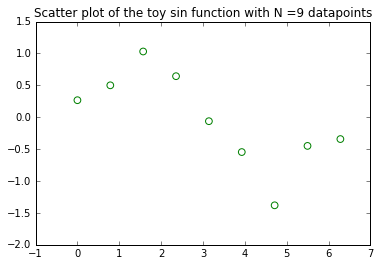

In [297]:
# PRODUCE SAMPLE DATA SET N = 9
N = 9
np.set_printoptions(precision=3)
x,t = gen_sinusoidal(N)

# Toy visualization
plt.scatter(x, t, color='green', alpha=1, s=45, facecolors='none')
plt.title('Scatter plot of the toy sin function with N =%s datapoints'%(N));


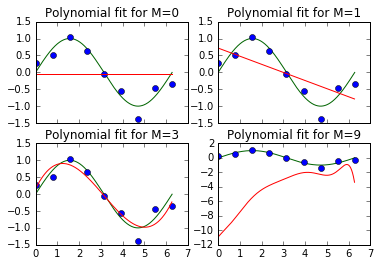

In [298]:
M = np.array([0,1,3,9])
def plot_prediction(poly_w, x, t, M):
    """ 
    INPUT: weights and x values of polynomial, x and t values to fit 
    OUTPUT: plots 4 polynomial fit
    This function plots 4 polynomial fits, each in a subplot
    """
    # CREATE AND MANAGE 4 SUBAXES
    axes = []
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')
    axes.append(ax1)
    axes.append(ax2)
    axes.append(ax3)
    axes.append(ax4)
    
    # PLOT IN EACH AXIS
    for i in np.arange(len(axes)):
        
        # PLOT REAL SIN(X) FUNCTION
        xx = np.arange(min(x),max(x),.01)
        axes[i].plot(xx, np.sin(xx), color='darkgreen')
        # PLOT TOY DATA SIN(X) WITH NORMAL NOISE
        axes[i].plot(x,t,'bo')
        # PLOT POLYNOMIAL FIT
        xnew = np.arange(min(xx),max(xx),.01)
        poly_xnew = create_polyval(xnew,M[i])
        axes[i].plot(xnew, poly_xnew.dot(poly_w[i]) ,color='red')
        # NAME THE PLOT
        axes[i].set_title('Polynomial fit for M=%u'%(M[i]))
        
        
w1 = fit_model(x,t,M)
plot_prediction(w1, x, t, M)


### 1.4 Regularized linear regression (10 points)

Write a method `fit_polynomial_reg(x, t, M, lamb)` that fits a _regularized_ $M$-th order polynomial to the sinusoidal data, as discussed in the lectures, where `lamb` is the regularization term _lambda_. (Note that 'lambda' cannot be used as a variable name in Python since it has a special meaning). The error function to minimize w.r.t. $\bw$:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$

For background, see section 3.1.4 of Bishop's book.

In [299]:
def fit_polynomial_reg(x,t,M,lamb):
    """ 
    INPUT: x vector, t values to fit with Mth order polynomial, regularized by lamb
    OUTPUT: w vector of weights
    This function fits a polynomial, using regularization, to the given data using Normal equations
    """    
    
    phi = create_polyval(x,M)
    
    w = np.dot(np.linalg.inv(lamb*np.eye(M+1)+np.dot(phi.T,phi)),np.dot(phi.T,t))    
    
    return w

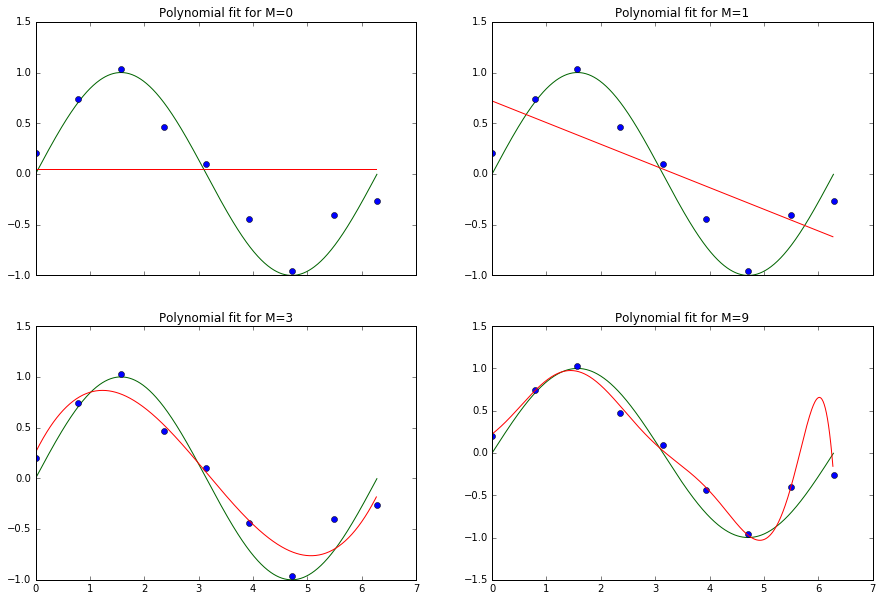

In [300]:
# PRODUCE PLOTS FOR REGULARIZED FITTING
M = np.array([0,1,3,9])
N = 9

x,t  = gen_sinusoidal(N)
pylab.rcParams['figure.figsize'] = (15, 10)
poly_w_reg = fit_model(x,t,M,lamb=0.05)
plot_prediction(poly_w_reg,x,t, M)






### 1.5 Model selection by cross-validation (10 points)
Use cross-validation to find a good choice of $M$ and $\lambda$, given a dataset of $N=9$ datapoints generated with `gen_sinusoidal(9)`. You should write a function that tries (loops over) a reasonable range of choices of $M$ and $\lambda$, and returns the choice with the best cross-validation error. In this case you can use $K=9$ folds, corresponding to _leave-one-out_ crossvalidation.

You can let $M \in (0, 1, ..., 10)$, and let $\lambda \in (e^{-10}, e^{-9}, ..., e^{0})$.

To get you started, here's a method you can use to generate indices of cross-validation folds.

In [301]:
def kfold_indices(N, k):
    all_indices = np.arange(N,dtype=int)
    np.random.shuffle(all_indices)
    idx = np.floor(np.linspace(0,N,k+1))
    train_folds = []
    valid_folds = []
    for fold in range(k):
        valid_indices = all_indices[idx[fold]:idx[fold+1]]
        valid_folds.append(valid_indices)
        train_folds.append(np.setdiff1d(all_indices, valid_indices))
    return train_folds, valid_folds

Create a comprehensible plot of the cross-validation error for each choice of $M$ and $\lambda$. Highlight the best choice. 

_Question_: Explain over-fitting and underfitting, illuminated by your plot. Explain the relationship with model bias and model variance.

Answer: 

Overfitting results in a high variance while underfitting results in high bias. 

M is the order of the polynomial, and thus high values create high variance while low values create high bias. 

Lambda restricts the size of the weight vectors; therefore, a high lambda corresponds to high bias while a low lambda results in high variance.


The plot shows a cone in the middle of the parameters, which leads us to think the best choice for M is around 5 while the best value for lambda is aroun e^-5. This shows a good balance between the two. 

In [302]:
def train_cv(x, t, M_fold, l_fold, K):
    weights_k_fold = []
    poly_x_k_fold = []
    x_folds = []
    t_folds = []
    v_folds = []


    # SET PARAMETERS
    for m in range(M_fold.shape[0]):
        for l in range(l_fold.shape[0]):

            # LOOP THROUGH FOLDS
            for k in range(K): 
                # CREATE DATA INDICES FOR THIS FOLD
                x_fold = x[x_ind[k]]
                t_fold = t[x_ind[k]]
                v_fold = t[t_ind[k]]
                x_folds.append(x_fold)
                t_folds.append(t_fold)
                v_folds.append(v_fold)

                # CREATE POLYNOMIALS
                weights = fit_model(x_fold,t_fold, M_fold[m],l_fold[l]) 
                #print "weights: ", len(weights)
                poly_x = create_polyval(x_fold, M_fold[m]) 
                #print "basis", len(poly_x)
                weights_k_fold.append(weights)
                poly_x_k_fold.append(poly_x)


    print 'total number of models:', len(weights_k_fold)

In [303]:
def calculate_errors(M_fold, l_fold, K, weights_k_fold, poly_x_k_fold, v_folds):
    settings_errors = []

    # SET PARAMETERS
    idx = 0
    for m in range(M_fold.shape[0]):   
        for l in range(l_fold.shape[0]):       
            # LOOP THROUGH FOLDS RESULTS
            folds_error = []

            for k in range(K):                
                # calculate weights and basis for polynomial
                weights = np.array(weights_k_fold[idx])
                basis = poly_x_k_fold[idx]

                # predict
                prediction = weights.dot(np.transpose(basis))

                # SAVE ERROR
                error = rmse(prediction, v_folds[idx])
                #print error
                folds_error.append(error)
                idx = idx + 1


            # AVERAGE ERROR FOR THIS SETTING
            s_error = sum(folds_error)/len(folds_error)
            #print "m: ", m, "lambda: ", l, "resulting in this error: ", s_error

            tup = [m, l, s_error]
            settings_errors.append(tup)

    print "number of settings", len(settings_errors)
    
    return settings_errors

In [304]:
def plot_cv_error(errors):
    errors_array = np.array(errors)
    
    # CREATE FIGURE
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # PLOT
    ax.scatter(errors_array[:,0], errors_array[:,1], errors_array[:,2])
    
    ax.set_xlabel('Mth order polynomial')
    ax.set_ylabel('lambda regularization term')
    ax.set_zlabel('error')

c:\miniconda2\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


total number of models: 1089
number of settings 121
[[  0.      0.      0.627]
 [  0.      1.      0.627]
 [  0.      2.      0.627]
 [  0.      3.      0.627]
 [  0.      4.      0.627]
 [  0.      5.      0.627]
 [  0.      6.      0.627]
 [  0.      7.      0.627]
 [  0.      8.      0.626]
 [  0.      9.      0.624]
 [  0.     10.      0.62 ]
 [  1.      0.      0.743]
 [  1.      1.      0.743]
 [  1.      2.      0.743]
 [  1.      3.      0.743]
 [  1.      4.      0.743]
 [  1.      5.      0.743]
 [  1.      6.      0.742]
 [  1.      7.      0.74 ]
 [  1.      8.      0.735]
 [  1.      9.      0.724]
 [  1.     10.      0.702]
 [  2.      0.      0.763]
 [  2.      1.      0.763]
 [  2.      2.      0.763]
 [  2.      3.      0.763]
 [  2.      4.      0.763]
 [  2.      5.      0.762]
 [  2.      6.      0.76 ]
 [  2.      7.      0.756]
 [  2.      8.      0.746]
 [  2.      9.      0.731]
 [  2.     10.      0.713]
 [  3.      0.      0.924]
 [  3.      1.      0.924]
 [ 

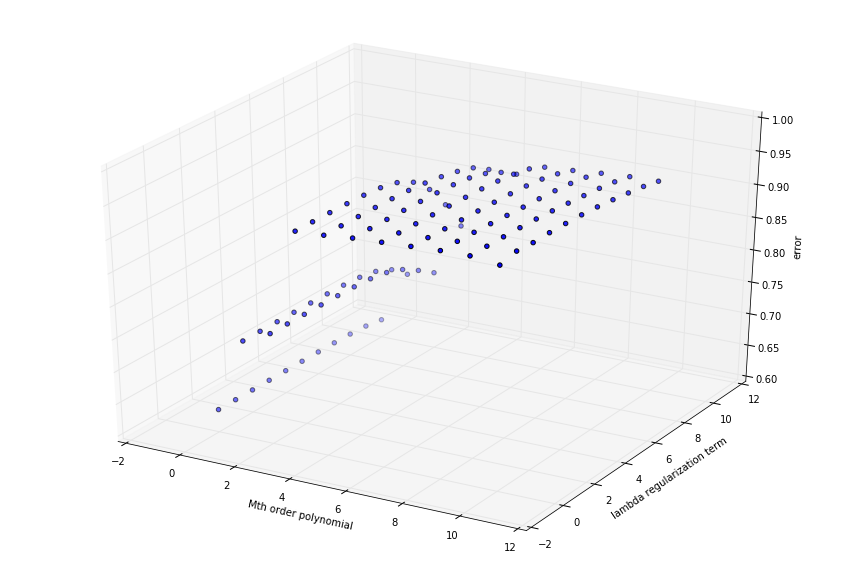

In [310]:
# MODEL PARAMETERS
M_fold = np.linspace(0,10,11).astype(int)
l_fold = np.exp(np.linspace(-10,0,11))
N = 9
K = 9

# GET FOLD BATCHES
x_ind,t_ind =  kfold_indices(N,K)
    
# TRAIN MODEL
train_cv(x, t, M_fold, l_fold, K)

# CALCULATE ERROR
settings_errors = calculate_errors(M_fold, l_fold, K, weights_k_fold, poly_x_k_fold, v_folds)

# GET TOP 10 SETTINGS
#top_settings = settings_errors[np.argsort(settings_errors[:,2])]
#top_settings = np.argsort(settings_errors[:,2])
print np.array(settings_errors)

# CREATE 3D PLTO
plot_cv_error(settings_errors)

### 1.6 Plot best cross-validated fit (5 points)

For some dataset with $N = 9$, plot the model with the optimal $M$ and $\lambda$ according to the cross-validation error, using the method you just wrote. Let the plot make clear which $M$ and $\lambda$ were found.

In [ ]:
def plot_top_predictions_cv(poly_w, x, t, M, lambd):
    """
    INPUT: weights and x values of polynomial, x and t values to fit \n",
    OUTPUT: plots 10 polynomial fit\n",
    This function plots 4 polynomial fits, each in a subplot\n",
    """
    
    # CREATE AND MANAGE 10 SUBAXES
    axes = []
    f, ((ax1, ax2,ax3, ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5 , sharex='col')
    axes.append(ax1)
    axes.append(ax2)
    axes.append(ax3)
    axes.append(ax4)
    axes.append(ax5)
    axes.append(ax6)
    axes.append(ax7)
    axes.append(ax8)
    axes.append(ax9)
    axes.append(ax10)

    poly_w = np.array(poly_w)
    
    # PLOT IN EACH AXIS
    for i in np.arange(len(axes)):
        plt.tight_layout()
        
        # PLOT REAL SIN(X) FUNCTION
        ##xx = np.arange(min(x),max(x),.01)
        axes[i].plot(x,np.sin(x),color='darkgreen')
        # PLOT TOY DATA SIN(X) WITH NORMAL NOISE
        axes[i].plot(x,t,'bo')
        # PLOT POLYNOMIAL FIT
        xnew = np.arange(min(x),max(x),.01)
        poly_xnew = create_polyval(xnew, M[i])
        #ynew = np.polyval(poly_w[i],xnew)
        axes[i].plot(xnew, poly_xnew.dot(poly_w[i]) ,color='red')
        # NAME THE PLOT
        axes[i].set_title('Polynomial fit for M=%u'%(M[i]))

In [ ]:
def plot_best_prediction(poly_w, x, t, M):   
    # CREATE AND MANAGE 10 SUBAXES
    axes = []
    f, ax1 = plt.subplots(1 , sharex='col')
    axes.append(ax1)

    poly_w = np.array(poly_w)
    
    # PLOT IN EACH AXIS
    plt.tight_layout()
    
    # PLOT REAL SIN(X) FUNCTION
    plot(x,np.sin(x),color='darkgreen')
    # PLOT TOY DATA SIN(X) WITH NORMAL NOISE
    plot(x,t,'bo')
    # PLOT POLYNOMIAL FIT
    xnew = np.arange(min(x),max(x),.01)
    poly_xnew = create_polyval(xnew, M)
    #ynew = np.polyval(poly_w[i],xnew)
    plot(xnew, poly_xnew.dot(np.transpose(poly_w)) ,color='red')
    # NAME THE PLOT
    #set_title('Polynomial fit for M=%u'%(M))


In [ ]:
# PRODUCE PLOTS FOR TOP CROSS VALIDATION FITTING
M_best = np.linspace(0,10,11).astype(int)
l_best = np.exp(np.linspace(-10,0,11))
N = 9
K = 9

x,t  = gen_sinusoidal(N)
pylab.rcParams['figure.figsize'] = (15, 10)

# CHOOSE LAMBDA = e^-5
poly_w_reg = fit_model(x,t,M_fold,l_fold[4])
plot_top_predictions_cv(poly_w_reg,x,t, M_best, l_best)

In [ ]:
# PRODUCE BEST PLOTS 
M = M_fold[5]
N = 9
lamb = l_fold[6]

x,t  = gen_sinusoidal(N)
pylab.rcParams['figure.figsize'] = (15, 10)
poly_w_reg = fit_model(x,t,M,lamb)
plot_best_prediction(poly_w_reg,x,t, M)

## Part 2: Bayesian Linear (Polynomial) Regression

### 2.1 Sinusoidal data 2 (5 points)

Write a function `gen_sinusoidal2(N)` that behaves identically to `gen_sinusoidal(N)` except that the generated values $x_i$ are not linearly spaced, but drawn from a uniform distribution between $0$ and $2 \pi$.

In [ ]:
pylab.rcParams['figure.figsize'] = (10, 6)
def gen_sinusoidal2(N):
    #print 'generating sin polynomial data'
    sigma = 0.2
    #CREATE EVENLY SPACED VALUES IN [0,2π] SPACE
    x = np.random.uniform(0,2*np.pi,N)
    # SINCE THE NP.RANDOM.NORMAL TAKES THE STANDARD DEVIATION WE 
    t = np.random.normal(loc=np.sin(x),scale=sigma)
    return x,t


### 2.2 Compute Posterior (15 points)

You're going to implement a Bayesian linear regression model, and fit it to the sinusoidal data. Your regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(\bw \;|\; \alpha) = \mathcal{N}(\bw \;|\; 0, \alpha^{-1} \bI)$$

The covariance and mean of the posterior are given by:

$$\bS_N= \left( \alpha \bI + \beta \bPhi^T \bPhi \right)^{-1} $$
$$\bm_N = \beta\; \bS_N \bPhi^T \bt$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 
See MLPR chapter 3.3 for background.

Write a method `fit_polynomial_bayes(x, t, M, alpha, beta)` that returns the mean $\bm_N$ and covariance $\bS_N$ of the posterior for a $M$-th order polynomial, given a dataset, where `x`, `t` and `M` have the same meaning as in question 1.2.

In [ ]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
  
    phi = create_polyval(x,M)
    cov = np.linalg.inv(alpha*np.eye(M+1)+ beta*np.dot(phi.T,phi))
    mu  = beta*cov.dot(phi.T.dot(t))
    return cov,mu
def fit_polynomial_bayes2(x, t, M, alpha, beta):
    Phi = np.zeros((N,M+1))
    for i in range(M+1):
        xi = np.power(x,i)
        Phi[:,i] = np.transpose(xi)
    PhiT = np.transpose(Phi)
    I=np.identity(M+1)
    S=np.linalg.inv(np.dot(alpha,I)+np.dot(beta,np.dot(PhiT,Phi)))
    m=np.dot(beta,np.dot(S,np.dot(PhiT,t)))
    return S, m

### 2.3 Prediction (10 points)

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; \bx, \bt, \alpha, \beta) = \mathcal{N}(t \;|\; \bm_N^T \phi(\bx), \sigma_N^2(\bx))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(\bx)^T \bS_N \phi(\bx) $$

where $\phi(\bx)$ are the computed features for a new datapoint $\bx$, and $t$ is the predicted variable for datapoint $\bx$. 

Write a function that `predict_polynomial_bayes(x, m, S, beta)` that returns the predictive mean and variance given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [ ]:

def predict_polynomial_bayes(x, m, S, beta,M):
    
    x = phi
    
    pred_m=m.T.dot(phi)
    pred_S=1/beta+ np.dot(phi.T.dot(S),phi)
#     print pred_S
    return pred_S, pred_m


### 2.4 Plot predictive distribution (10 points)

a) (5 points) Generate 7 datapoints with `gen_sinusoidal2(7)`. Compute the posterior mean and covariance for a Bayesian polynomial regression model with $M=5$, $\alpha=\frac{1}{2}$ and $\beta=\frac{1}{0.2^2}$.
Plot the Bayesian predictive distribution, where you plot (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and a 1-sigma predictive variance using `plt.fill_between(..., alpha=0.1)` (the alpha argument induces transparency).

Include the datapoints in your plot.

b) (5 points) For a second plot, draw 100 samples from the parameters' posterior distribution. Each of these samples is a certain choice of parameters for 5-th order polynomial regression. 
Display each of these 100 polynomials.

In [ ]:
N = 7
beta = 1/0.2**2
alpha = 1/2
M = 5
N = 7
x,t = gen_sinusoidal2(N)
# print x
# print t
cov,mu = fit_polynomial_bayes2(x,t,M,alpha,beta)

# plt.scatter(x,t,color='blue',alpha=1,s=45,facecolors='none')
# plt.title('Scatter plot of the toy sin function with N=%s data points'%(N));
pred_m=[]
pred_S=[]
for i in range(N):
    x_pred_S,x_pred_m=predict_polynomial_bayes(x[i], mu, cov, beta,M)
    pred_m.append(x_pred_m)
    pred_S.append(x_pred_S) 
figure = plt.figure()


Npost = 1000


D=np.linspace(0,2*np.pi,Npost)
for i in range(Npost):
    x,t=gen_sinusoidal2(7)
    S,m=fit_polynomial_bayes(x, t, 5,alpha,beta)
    plt.plot(D,[np.polynomial.polynomial.polyval(point,m) for point in D])
plt.axis([0.0,2*np.pi,-5,5])
plt.plot(D,[np.sin(point) for point in D])
up = np.array(pred_m)+np.array(pred_S)
down = np.array(pred_m)-np.array(pred_S)
down = np.ma.masked_greater(down, 1.0)    
plt.fill_between(x,up,down,where=down <= up,alpha=0.5, facecolor='green', interpolate=True)

### 2.5 Additional questions (10 points)

a) (5 points) Why is $\beta=\frac{1}{0.2^2}$ the best choice of $\beta$ in section 2.4?

b) (5 points) In the case of Bayesian linear regression, both the posterior of the parameters $p(\bw \;|\; \bt, \alpha, \beta)$ and the predictive distribution $p(t \;|\; \bw, \beta)$ are Gaussian. In consequence (and conveniently), $p(t \;|\; \bt, \alpha, \beta)$ is also Gaussian (See Bishop's book section 3.3.2 and homework 2 question 4). This is actually one of the (rare) cases where we can make Bayesian predictions without resorting to approximative methods.

Suppose you have to work with some model $p(t\;|\;x,\bw)$ with parameters $\bw$, where the posterior distribution $p(\bw\;|\;\mathcal{D})$ given dataset $\mathcal{D}$ can not be integrated out when making predictions, but where you can still generate samples from the posterior distribution of the parameters. Explain how you can still make approximate Bayesian predictions using samples from the parameters' posterior distribution.

a) If beta = 1 / 0.2^2, then we assume a sigma = 0.2. Since the toy data has been generated with exactly this sigma, the aasumption is accurate.

b) In case we cannot generate predictions analytically, we can use sampling methods where we calculate the average likelihood. Similarly, we can calculate the variance by using the sampled points.